# Support vector classifiers - SVC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples = 1000, n_features=2,n_classes = 2, n_clusters_per_class=1,n_redundant=0, random_state=42)

In [74]:
pd.DataFrame(X)[0]

0      0.601034
1      0.755945
2      1.354479
3      3.103090
4      0.753178
         ...   
995    1.713939
996    1.509473
997    2.844315
998   -0.025876
999    3.641478
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

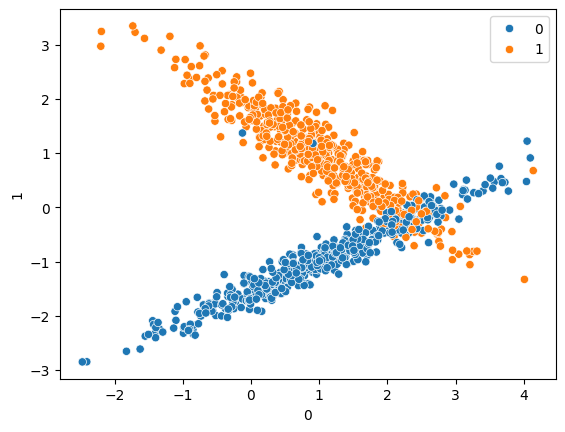

In [75]:
sns.scatterplot(data=pd.DataFrame(X,y),x=0,y = 1,hue=y)

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=42)

In [77]:
from sklearn.svm import SVC
svc = SVC(kernel= 'linear')
svc.fit(X_train, y_train)
pred = svc.predict(X_test)

In [78]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy Score: ", accuracy_score(y_test,pred))
print("Classification Report: \n", classification_report(y_test,pred))

Accuracy Score:  0.912
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       124
           1       0.99      0.83      0.91       126

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



Writing a reusable function to calculate the maximum accuracy on `x` kernel

In [79]:
def kernal_selection(kernal):
    svc = SVC(kernel = kernal)
    svc.fit(X_train,y_train)
    pred_svc = svc.predict(X_test)
    print("Accuracy Score: ", accuracy_score(y_test, pred_svc))
    print("Classification Report: \n", classification_report(y_test,pred_svc))

In [80]:
kernal_selection("linear")

Accuracy Score:  0.912
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       124
           1       0.99      0.83      0.91       126

    accuracy                           0.91       250
   macro avg       0.92      0.91      0.91       250
weighted avg       0.92      0.91      0.91       250



In [81]:
kernal_selection("poly")

Accuracy Score:  0.9
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       124
           1       0.95      0.85      0.90       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



In [82]:
kernal_selection("rbf")

Accuracy Score:  0.916
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       124
           1       0.99      0.84      0.91       126

    accuracy                           0.92       250
   macro avg       0.93      0.92      0.92       250
weighted avg       0.93      0.92      0.92       250



In [83]:
kernal_selection("sigmoid")

Accuracy Score:  0.896
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       124
           1       0.95      0.83      0.89       126

    accuracy                           0.90       250
   macro avg       0.90      0.90      0.90       250
weighted avg       0.90      0.90      0.90       250



### Hyperparameter tuning

##### Applying grid search CV

In [84]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C':[0.,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0007],
    'kernel' : ['rbf']
}
grid = GridSearchCV(SVC(),param_grid=param_grid, refit=True, cv = 5, verbose=True)

In [85]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", 

,estimator,SVC()
,param_grid,"{'C': [0.0, 1, ...], 'gamma': [1, 0.1, ...], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [86]:
pred = grid.predict(X_test)

In [88]:
print("Accuracy Score: ", accuracy_score(y_test, pred))
print("Classification Report: \n", classification_report(y_test,pred))

Accuracy Score:  0.94
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       124
           1       0.97      0.90      0.94       126

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250

